# Simple gradient method

In [1]:
import matplotlib.pyplot as plt
import autograd.numpy as np

In [2]:
def himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

def ackley(x):
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x[0]**2 + x[1]**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1]))) + 20 + np.e

In [3]:
def himmelblau_grad(x, y):
    return np.array([4 * x * (x**2 + y - 11) + 2 * (x + y**2 - 7), 2 * (x**2 + y - 11) + 4 * y * (x + y**2 -7)])

def ackley_grad(x, y):
    return np.array([2 * x * (0.5 * (x**2 + y**2))**(-0.5) * np.e**(-0.2 * (0.5 * (x**2 + y**2))**0.5) + np.pi * np.sin(2 * np.pi * x) * np.e**(0.5 * np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y)), 2 * y * (0.5 * (x**2 + y**2))**(-0.5) * np.e**(-0.2 * (0.5 * (x**2 + y**2))**0.5) + np.pi * np.sin(2 * np.pi * y) * np.e**(0.5 * np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))])

## Function visualisation
### 1. Himmelblau's function

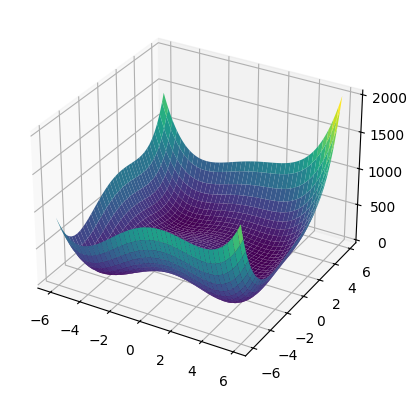

In [4]:
x = np.arange(-6, 6, 0.1)
y = np.arange(-6, 6, 0.1)

X, Y = np.meshgrid(x, y)
Z = himmelblau([X, Y])

ax = plt.subplot(projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis')
plt.show()

### 2. Auckley's function

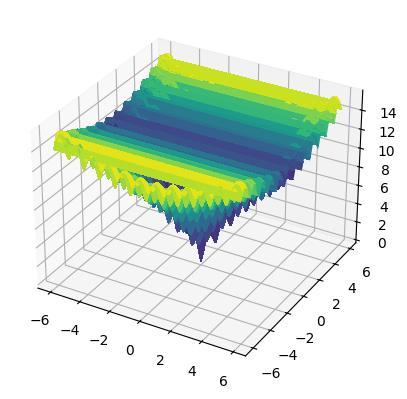

In [5]:
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)

X, Y = np.meshgrid(X, Y)
Z = ackley([X, Y])

ax = plt.subplot(projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis')
plt.show()

## Algorithm

In [6]:
from autograd import grad

In [7]:
def simpleGradient(function, x, learning_rate, err=0.0001, max_iter=10000):
    grad_f = grad(function)
    for _ in range(max_iter):
        gradient = grad_f(x)
        xnew = x - learning_rate * gradient
        new_pos = *xnew, function(xnew)
        if np.linalg.norm(xnew - x) < err:
            break
        x = xnew
    return new_pos

In [8]:
simpleGradient(himmelblau, np.array([4.0, -2.0]), 0.01)

(3.5844507038641624, -1.8483715496193591, 8.6852405180716e-07)

In [9]:
simpleGradient(ackley, np.array([0.4, 0.3]), 0.01)

(-0.013605141083609155, -0.013605117516841563, 0.064254234695174)

## Testing on different parameters

### 1. Himmelblau's function

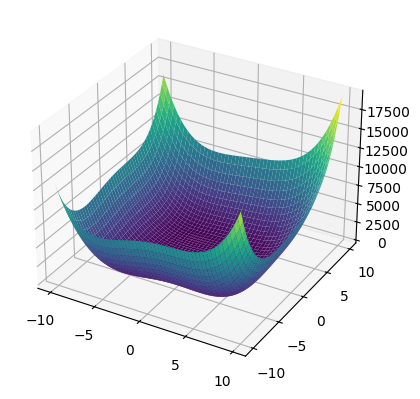

In [16]:
x = np.arange(-10, 10, 0.1)
y = np.arange(-10, 10, 0.1)

X, Y = np.meshgrid(x, y)
Z = himmelblau([X, Y])

ax = plt.subplot(projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis')
plt.show()

In [17]:
np.random.seed(42)

points = np.random.uniform(-10, 10, (20, 2))
points

array([[-2.50919762,  9.01428613],
       [ 4.63987884,  1.97316968],
       [-6.87962719, -6.88010959],
       [-8.83832776,  7.32352292],
       [ 2.02230023,  4.16145156],
       [-9.58831011,  9.39819704],
       [ 6.64885282, -5.75321779],
       [-6.36350066, -6.3319098 ],
       [-3.91515514,  0.49512863],
       [-1.36109963, -4.1754172 ],
       [ 2.23705789, -7.21012279],
       [-4.15710703, -2.67276313],
       [-0.87860032,  5.70351923],
       [-6.00652436,  0.28468877],
       [ 1.84829138, -9.07099175],
       [ 2.15089704, -6.58951753],
       [-8.69896814,  8.97771075],
       [ 9.31264066,  6.16794696],
       [-3.90772462, -8.04655772],
       [ 3.68466053, -1.19695013]])

In [18]:
points[0]

array([-2.50919762,  9.01428613])

Text(0.5, 1.0, 'Himmelblau function')

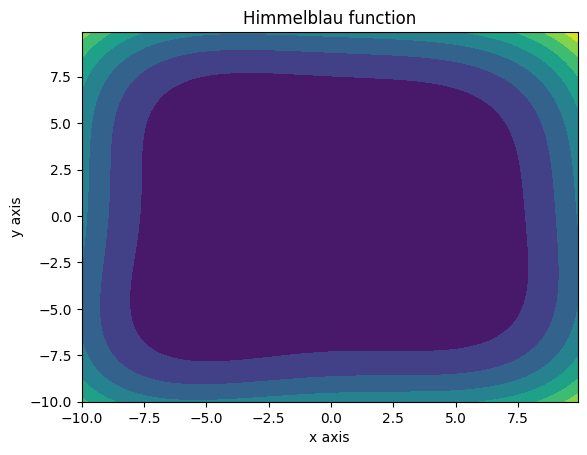

In [21]:
plt.scatter(points[:, 0], points[:, 1])

plt.tricontourf(X.flatten(), Y.flatten(), Z.flatten())
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Himmelblau function')